In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
%matplotlib.inline

UsageError: Line magic function `%matplotlib.inline` not found.


In [2]:
import xgboost as xgb

In [3]:
df=pd.read_csv('pima_diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [5]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [6]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

In [7]:
X= df.drop('Outcome',axis=1)
y=df['Outcome']

In [8]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [9]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
scaled_data=sc.fit_transform(X)
scaled_data.shape

(768, 8)

In [10]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(scaled_data,y,test_size=0.2,random_state=42)

In [11]:
## fit the model:
import warnings

model=XGBClassifier(objective='binary:logistic')
model.fit(X_train,y_train)

C:\Users\sathe\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[11:39:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [12]:
## Checking training accuracy:

y_preds=model.predict(X_train)
y_preds

array([0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0,

In [13]:
predictions=[round(value) for value in y_preds]
accuracy=accuracy_score(y_train,predictions)
accuracy

1.0

In [14]:
y_preds=model.predict(np.asarray(scaled_data[0].reshape(1,8)))
y_preds

array([1], dtype=int64)

In [15]:
arr=np.asarray(scaled_data[0])
arr.shape

(8,)

In [16]:
## Test the initial accuracy:
y_preds=model.predict(X_test)
predictions=[round(x) for x in y_preds]
accuracy=accuracy_score(predictions,y_test)
accuracy

0.6883116883116883

In [17]:
from sklearn.model_selection import GridSearchCV

In [18]:
params_grid={
    'learning_rate':[1,0.5,0.1,0.01,0.001],
    'max_depth':[3,5,10,20],
    'n_estimators':[10,50,100,200]
}

In [19]:
grid=GridSearchCV(XGBClassifier(objective='binary:logistic'),params_grid,verbose=3)

In [20]:
grid.fit(X_train,y_train)

Fitting 5 folds for each of 80 candidates, totalling 400 fits
[CV] learning_rate=1, max_depth=3, n_estimators=10 ...................
[11:39:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  learning_rate=1, max_depth=3, n_estimators=10, score=0.715, total=   0.0s
[CV] learning_rate=1, max_depth=3, n_estimators=10 ...................
[11:39:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  learning_rate=1, max_depth=3, n_estimators=10, score=0.780, total=   0.0s
[CV] learning_ra

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\sathe\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s



[CV] learning_rate=1, max_depth=3, n_estimators=50 ...................
[11:39:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  learning_rate=1, max_depth=3, n_estimators=50, score=0.756, total=   0.0s
[CV] learning_rate=1, max_depth=3, n_estimators=50 ...................
[11:39:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  learning_rate=1, max_depth=3, n_estimators=50, score=0.748, total=   0.1s
[CV] learning_rate=1, max_depth=3, n_estimators=50 ...................
[11:39

[11:39:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  learning_rate=1, max_depth=5, n_estimators=50, score=0.797, total=   0.1s
[CV] learning_rate=1, max_depth=5, n_estimators=50 ...................
[11:39:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  learning_rate=1, max_depth=5, n_estimators=50, score=0.740, total=   0.1s
[CV] learning_rate=1, max_depth=5, n_estimators=50 ...................
[11:39:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3

[CV]  learning_rate=1, max_depth=10, n_estimators=50, score=0.756, total=   0.1s
[CV] learning_rate=1, max_depth=10, n_estimators=50 ..................
[11:39:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  learning_rate=1, max_depth=10, n_estimators=50, score=0.772, total=   0.1s
[CV] learning_rate=1, max_depth=10, n_estimators=50 ..................
[11:39:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  learning_rate=1, max_depth=10, n_estimators=50, score=0.699, total=   

[CV]  learning_rate=1, max_depth=20, n_estimators=10, score=0.770, total=   0.0s
[CV] learning_rate=1, max_depth=20, n_estimators=50 ..................
[11:39:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  learning_rate=1, max_depth=20, n_estimators=50, score=0.715, total=   0.1s
[CV] learning_rate=1, max_depth=20, n_estimators=50 ..................
[11:39:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  learning_rate=1, max_depth=20, n_estimators=50, score=0.756, total=   

[CV]  learning_rate=0.5, max_depth=3, n_estimators=50, score=0.789, total=   0.1s
[CV] learning_rate=0.5, max_depth=3, n_estimators=50 .................
[11:39:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  learning_rate=0.5, max_depth=3, n_estimators=50, score=0.756, total=   0.1s
[CV] learning_rate=0.5, max_depth=3, n_estimators=50 .................
[11:39:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  learning_rate=0.5, max_depth=3, n_estimators=50, score=0.748, total=

[CV]  learning_rate=0.5, max_depth=5, n_estimators=50, score=0.772, total=   0.1s
[CV] learning_rate=0.5, max_depth=5, n_estimators=50 .................
[11:39:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  learning_rate=0.5, max_depth=5, n_estimators=50, score=0.732, total=   0.1s
[CV] learning_rate=0.5, max_depth=5, n_estimators=50 .................
[11:39:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  learning_rate=0.5, max_depth=5, n_estimators=50, score=0.732, total=

[CV]  learning_rate=0.5, max_depth=10, n_estimators=10, score=0.770, total=   0.0s
[CV] learning_rate=0.5, max_depth=10, n_estimators=50 ................
[11:39:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  learning_rate=0.5, max_depth=10, n_estimators=50, score=0.724, total=   0.1s
[CV] learning_rate=0.5, max_depth=10, n_estimators=50 ................
[11:39:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  learning_rate=0.5, max_depth=10, n_estimators=50, score=0.772, tot

[11:39:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  learning_rate=0.5, max_depth=20, n_estimators=10, score=0.746, total=   0.0s
[CV] learning_rate=0.5, max_depth=20, n_estimators=50 ................
[11:39:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  learning_rate=0.5, max_depth=20, n_estimators=50, score=0.732, total=   0.1s
[CV] learning_rate=0.5, max_depth=20, n_estimators=50 ................
[11:39:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_relea

[CV]  learning_rate=0.1, max_depth=3, n_estimators=50, score=0.780, total=   0.1s
[CV] learning_rate=0.1, max_depth=3, n_estimators=50 .................
[11:39:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  learning_rate=0.1, max_depth=3, n_estimators=50, score=0.829, total=   0.1s
[CV] learning_rate=0.1, max_depth=3, n_estimators=50 .................
[11:39:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  learning_rate=0.1, max_depth=3, n_estimators=50, score=0.764, total=

[CV]  learning_rate=0.1, max_depth=5, n_estimators=50, score=0.764, total=   0.1s
[CV] learning_rate=0.1, max_depth=5, n_estimators=50 .................
[11:39:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  learning_rate=0.1, max_depth=5, n_estimators=50, score=0.821, total=   0.1s
[CV] learning_rate=0.1, max_depth=5, n_estimators=50 .................
[11:39:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  learning_rate=0.1, max_depth=5, n_estimators=50, score=0.732, total=

[11:39:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  learning_rate=0.1, max_depth=10, n_estimators=10, score=0.762, total=   0.0s
[CV] learning_rate=0.1, max_depth=10, n_estimators=50 ................
[11:39:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  learning_rate=0.1, max_depth=10, n_estimators=50, score=0.740, total=   0.1s
[CV] learning_rate=0.1, max_depth=10, n_estimators=50 ................
[11:39:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_relea

[CV]  learning_rate=0.1, max_depth=20, n_estimators=10, score=0.691, total=   0.0s
[CV] learning_rate=0.1, max_depth=20, n_estimators=10 ................
[11:39:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  learning_rate=0.1, max_depth=20, n_estimators=10, score=0.754, total=   0.0s
[CV] learning_rate=0.1, max_depth=20, n_estimators=50 ................
[11:39:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  learning_rate=0.1, max_depth=20, n_estimators=50, score=0.740, tot

[CV]  learning_rate=0.01, max_depth=3, n_estimators=50, score=0.740, total=   0.1s
[CV] learning_rate=0.01, max_depth=3, n_estimators=50 ................
[11:40:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  learning_rate=0.01, max_depth=3, n_estimators=50, score=0.813, total=   0.1s
[CV] learning_rate=0.01, max_depth=3, n_estimators=50 ................
[11:40:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  learning_rate=0.01, max_depth=3, n_estimators=50, score=0.764, tot

[11:40:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  learning_rate=0.01, max_depth=5, n_estimators=50, score=0.748, total=   0.1s
[CV] learning_rate=0.01, max_depth=5, n_estimators=50 ................
[11:40:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  learning_rate=0.01, max_depth=5, n_estimators=50, score=0.772, total=   0.1s
[CV] learning_rate=0.01, max_depth=5, n_estimators=50 ................
[11:40:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_relea

[11:40:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  learning_rate=0.01, max_depth=10, n_estimators=10, score=0.754, total=   0.0s
[CV] learning_rate=0.01, max_depth=10, n_estimators=50 ...............
[11:40:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  learning_rate=0.01, max_depth=10, n_estimators=50, score=0.732, total=   0.1s
[CV] learning_rate=0.01, max_depth=10, n_estimators=50 ...............
[11:40:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[11:40:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  learning_rate=0.01, max_depth=20, n_estimators=10, score=0.754, total=   0.0s
[CV] learning_rate=0.01, max_depth=20, n_estimators=50 ...............
[11:40:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  learning_rate=0.01, max_depth=20, n_estimators=50, score=0.724, total=   0.1s
[CV] learning_rate=0.01, max_depth=20, n_estimators=50 ...............
[11:40:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[CV]  learning_rate=0.001, max_depth=3, n_estimators=50, score=0.707, total=   0.1s
[CV] learning_rate=0.001, max_depth=3, n_estimators=50 ...............
[11:40:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  learning_rate=0.001, max_depth=3, n_estimators=50, score=0.805, total=   0.1s
[CV] learning_rate=0.001, max_depth=3, n_estimators=50 ...............
[11:40:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  learning_rate=0.001, max_depth=3, n_estimators=50, score=0.764, 

[CV]  learning_rate=0.001, max_depth=5, n_estimators=50, score=0.724, total=   0.1s
[CV] learning_rate=0.001, max_depth=5, n_estimators=50 ...............
[11:40:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  learning_rate=0.001, max_depth=5, n_estimators=50, score=0.764, total=   0.1s
[CV] learning_rate=0.001, max_depth=5, n_estimators=50 ...............
[11:40:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  learning_rate=0.001, max_depth=5, n_estimators=50, score=0.756, 

[11:40:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  learning_rate=0.001, max_depth=10, n_estimators=10, score=0.738, total=   0.0s
[CV] learning_rate=0.001, max_depth=10, n_estimators=50 ..............
[11:40:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  learning_rate=0.001, max_depth=10, n_estimators=50, score=0.675, total=   0.1s
[CV] learning_rate=0.001, max_depth=10, n_estimators=50 ..............
[11:40:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_r

[CV] learning_rate=0.001, max_depth=20, n_estimators=10 ..............
[11:40:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  learning_rate=0.001, max_depth=20, n_estimators=10, score=0.730, total=   0.0s
[CV] learning_rate=0.001, max_depth=20, n_estimators=50 ..............
[11:40:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  learning_rate=0.001, max_depth=20, n_estimators=50, score=0.675, total=   0.1s
[CV] learning_rate=0.001, max_depth=20, n_estimators=50 ............

[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed:   51.6s finished


GridSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, random_state=None,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=None,
                                     tree_method=None, validate_parameter

In [21]:
grid.best_params_

{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50}

In [22]:
new_model=XGBClassifier(learning_rate=0.1,max_depth=3,n_estimators=50)
new_model.fit(X_train,y_train)

[11:40:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=50, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [23]:
y_preds_new=new_model.predict(X_test)
prediction_new=[round(x) for x in y_preds_new]
accuracy_new=accuracy_score(prediction_new,y_test)
accuracy_new

0.7597402597402597

In [24]:
import pickle
filename='Xgb_model.pickle'
pickle.dump(new_model,open(filename,'wb'))
loaded_model=pickle.load(open(filename,'rb'))
loaded_model

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=50, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [25]:
# we will save the scaler object for prediction:
filename_scalar='XGB_scalar.pickle'
pickle.dump(sc,open(filename_scalar,'wb'))
scalar_model=pickle.load(open(filename_scalar,'rb'))

In [26]:
pwd

'C:\\Users\\sathe\\Satheesh_SK\\Sample projects'

In [27]:
## Trying a random predictions:
d=scalar_model.transform([[6,148,72,35,80,33.6,0.627,50]])
pred=loaded_model.predict(d)
print('This is the class belongs to diabetes or not: ',pred[0])

This is the class belongs to diabetes or not:  1


# XgBoosting Using Randomized SearchCV

In [28]:
df1=pd.read_csv('https://raw.githubusercontent.com/sharmaroshan/Churn-Modelling-Dataset/master/Churn_Modelling.csv')

In [29]:
df1.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [30]:
cormat=df1.corr()
top_corr_feature=cormat.index
top_corr_feature

Index(['RowNumber', 'CustomerId', 'CreditScore', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

<AxesSubplot:>

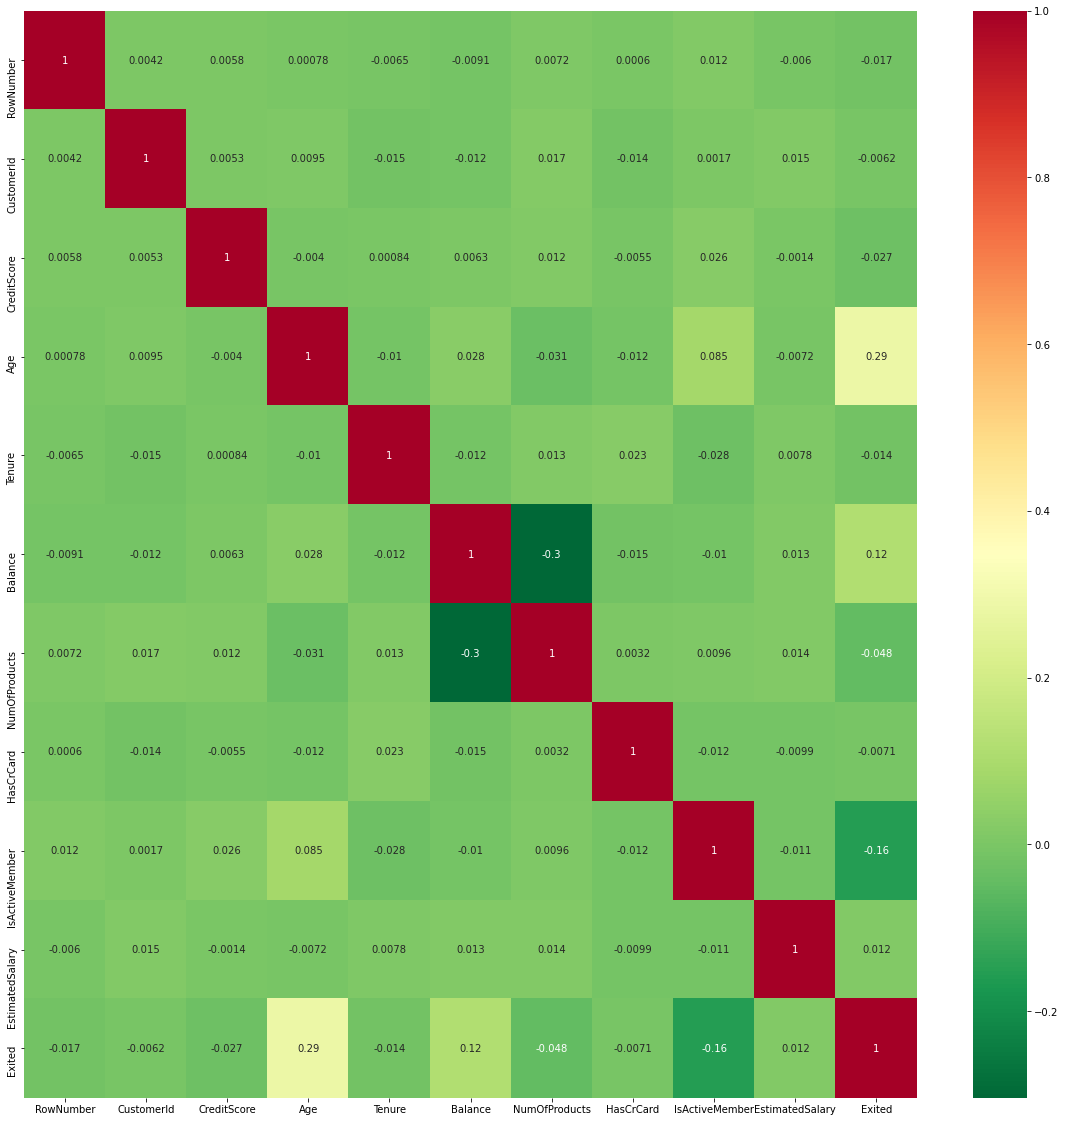

In [31]:
plt.figure(figsize=(20,20))
# plot the heat map:
g=sns.heatmap(df1.corr(),annot=True,cmap='RdYlGn_r')
g

In [47]:
X1=df1.iloc[:,3:13]
y1=df1.iloc[:,13]

In [48]:
geography=pd.get_dummies(X1['Geography'],drop_first=True)

In [49]:
geography

,Germany,Spain
0,0,0
1,0,1
2,0,0
3,0,0
4,0,1
...,...,...
9995,0,0
9996,0,0
9997,0,0
9998,1,0


In [50]:
gender=pd.get_dummies(X1['Gender'])
gender.head()

,Female,Male
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0


In [56]:
X=X1.drop(['Geography','Gender'],axis=1)
X

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,42,2,0.00,1,1,1,101348.88
1,608,41,1,83807.86,1,0,1,112542.58
2,502,42,8,159660.80,3,1,0,113931.57
3,699,39,1,0.00,2,0,0,93826.63
4,850,43,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64
9996,516,35,10,57369.61,1,1,1,101699.77
9997,709,36,7,0.00,1,0,1,42085.58
9998,772,42,3,75075.31,2,1,0,92888.52


In [57]:
X=pd.concat([X,geography,gender],axis=1)

In [58]:
X

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Female,Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,1,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,1,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,1,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,0,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,0,0,1,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,0,0,1


In [59]:
## Hyper optimize:
params={
    'learning_rate':[0.05,0.10,0.15,0.20,0.25,0.30],
    'max_depth':[3,4,5,6,8,10,12,16],
    'min_child_weight':[1,3,5,7],
    'gamma':[0.1,0.2,0.3,0.4],
    'colsample_bytree':[0.3,0.4,0.5,0.6,0.7]
}

In [60]:
from sklearn.model_selection import RandomizedSearchCV

In [61]:
random_search=RandomizedSearchCV(model,param_distributions=params,n_iter=5,scoring='roc_auc',n_jobs=-1,verbose=3
                    )

In [62]:
random_search

RandomizedSearchCV(estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1, gamma=0,
                                           gpu_id=-1, importance_type='gain',
                                           interaction_constraints='',
                                           learning_rate=0.300000012,
                                           max_delta_step=0, max_depth=6,
                                           min_child_weight=1, missing=nan,
                                           monotone_constraints='()',
                                           n_estimators=100, n_jobs=8,
                                           num_paralle...
                                           reg_alpha=0, reg_lambda=1,
                                           scale_pos_weight=1, subsample=1,
          

In [63]:
random_search.fit(X,y)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  19 out of  25 | elapsed:    4.1s remaining:    1.2s
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:    4.7s finished
C:\Users\sathe\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[11:52:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


RandomizedSearchCV(estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1, gamma=0,
                                           gpu_id=-1, importance_type='gain',
                                           interaction_constraints='',
                                           learning_rate=0.300000012,
                                           max_delta_step=0, max_depth=6,
                                           min_child_weight=1, missing=nan,
                                           monotone_constraints='()',
                                           n_estimators=100, n_jobs=8,
                                           num_paralle...
                                           reg_alpha=0, reg_lambda=1,
                                           scale_pos_weight=1, subsample=1,
          

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Female,Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,1,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,1,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,1,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,0,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,0,0,1,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,0,0,1


In [65]:
random_search.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7, gamma=0.4, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.25, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [66]:
random_search.best_params_

{'min_child_weight': 1,
 'max_depth': 3,
 'learning_rate': 0.25,
 'gamma': 0.4,
 'colsample_bytree': 0.7}

In [70]:
classifier=xgb.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7, gamma=0.4, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.25, max_delta_step=0, max_depth=3,
              min_child_weight=1,  monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [71]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(classifier,X,y,cv=10)

C:\Users\sathe\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[11:59:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:59:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:59:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:59:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

In [72]:
score

array([0.869, 0.863, 0.878, 0.869, 0.862, 0.856, 0.871, 0.875, 0.858,
       0.854])

In [73]:
score.mean()

0.8654999999999999